In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../sample_dataset/updated_cybersecurity_attacks.csv')



In [65]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              40000 non-null  int64  
 1   Timestamp               40000 non-null  object 
 2   Source IP Address       40000 non-null  object 
 3   Destination IP Address  40000 non-null  object 
 4   Source Port             40000 non-null  int64  
 5   Destination Port        40000 non-null  int64  
 6   Protocol                40000 non-null  object 
 7   Packet Length           40000 non-null  int64  
 8   Packet Type             40000 non-null  object 
 9   Traffic Type            40000 non-null  object 
 10  Payload Data            40000 non-null  object 
 11  Malware Indicators      40000 non-null  object 
 12  Anomaly Scores          40000 non-null  float64
 13  Alerts/Warnings         40000 non-null  object 
 14  Attack Type             40000 non-null

,Unnamed: 0,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,...,Log Source,Browser,Device/OS,Year,Month,Day,Hour,Minute,Second,DayOfWeek
0,0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,...,Server,Mozilla,Windows,2023,5,30,6,33,58,1
1,1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,...,Firewall,Mozilla,Windows,2020,8,26,7,8,30,2
2,2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,...,Firewall,Mozilla,Windows,2022,11,13,8,23,25,6
3,3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,...,Firewall,Mozilla,Macintosh,2023,7,2,10,38,46,6
4,4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,...,Firewall,Mozilla,Windows,2023,7,16,13,11,7,6


In [66]:
df.describe()

,Unnamed: 0,Source Port,Destination Port,Packet Length,Anomaly Scores,Year,Month,Day,Hour,Minute,Second,DayOfWeek
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,32970.356450,33150.868650,781.452725,50.113473,2021.411375,6.288275,15.629550,11.507350,29.511825,29.591300,2.995750
std,11547.14972,18560.425604,18574.668842,416.044192,28.853598,1.085253,3.332979,8.771715,6.919122,17.360543,17.357387,2.004515
min,0.00000,1027.000000,1024.000000,64.000000,0.000000,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,16850.750000,17094.750000,420.000000,25.150000,2020.000000,3.000000,8.000000,5.000000,14.000000,14.000000,1.000000
50%,19999.50000,32856.000000,33004.500000,782.000000,50.345000,2021.000000,6.000000,16.000000,12.000000,29.000000,30.000000,3.000000
75%,29999.25000,48928.250000,49287.000000,1143.000000,75.030000,2022.000000,9.000000,23.000000,17.000000,45.000000,45.000000,5.000000
max,39999.00000,65530.000000,65535.000000,1500.000000,100.000000,2023.000000,12.000000,31.000000,23.000000,59.000000,59.000000,6.000000


In [67]:
df.isnull().sum()

Unnamed: 0                0
Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
Browser                   0
Device/OS                 0
Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
DayOfWeek                 0
dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_19564\4217444865.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index, palette='viridis')


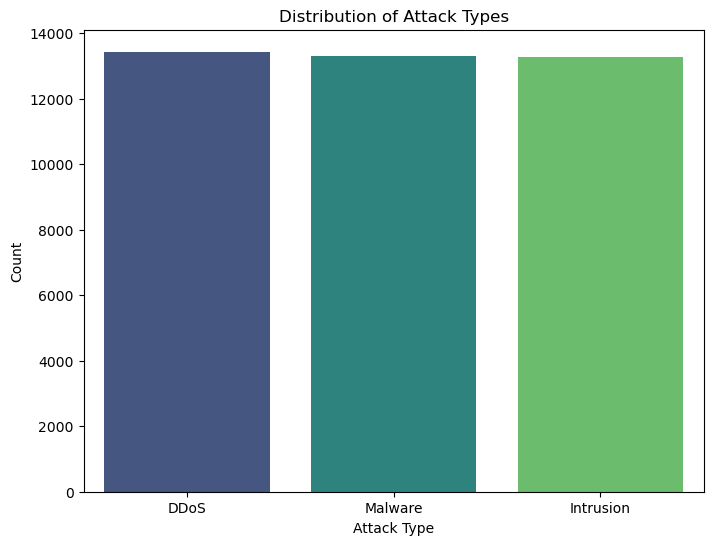

In [79]:
# Distribution of attack types

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index, palette='viridis')
plt.title("Distribution of Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.show()

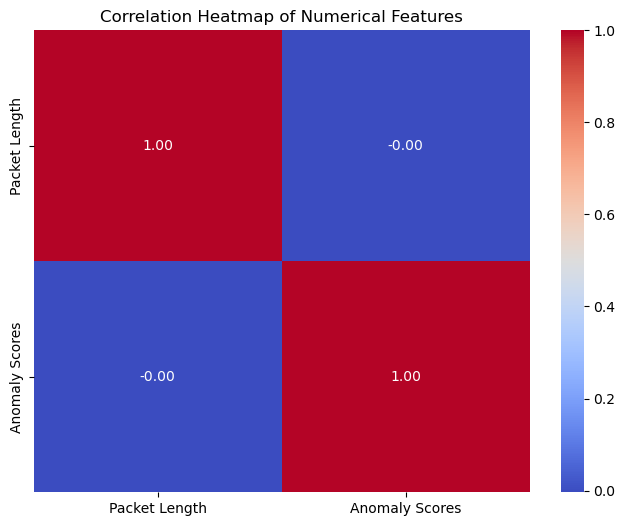

In [70]:
# correlation heatmap for numerical features

numerical_features = ['Packet Length', 'Anomaly Scores']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

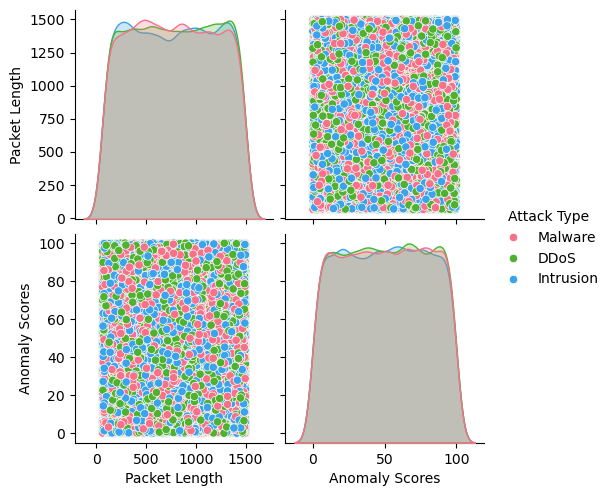

In [71]:
# Pairplot for numerical features
sns.pairplot(df[numerical_features + ['Attack Type']], hue='Attack Type', palette='husl')
plt.show()

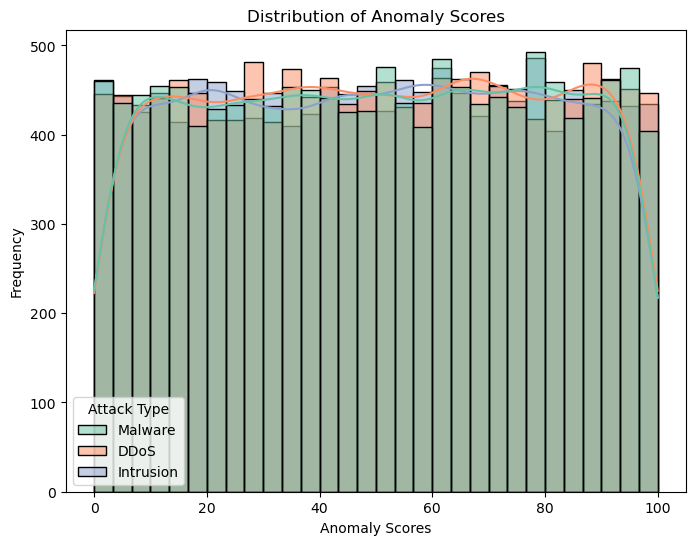

In [80]:
# Distribution of anomaly scores
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Anomaly Scores', bins=30, kde=True, hue='Attack Type', palette='Set2')
plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Scores")
plt.ylabel("Frequency")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11864\1508165597.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.66929478  0.94353482 -1.14280809 ...  0.62866049 -0.7173672
  0.94593844]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_filtered.loc[:, ['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(
C:\Users\DELL\AppData\Local\Temp\ipykernel_11864\1508165597.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Binary Attack Type'] = (data_filtered[target] == 'Malware').astype(int)



Classification Report for KNN:
               precision    recall  f1-score   support

      Normal       0.67      0.78      0.72      8044
     Malware       0.32      0.21      0.25      3956

    accuracy                           0.59     12000
   macro avg       0.49      0.49      0.48     12000
weighted avg       0.55      0.59      0.56     12000

Confusion Matrix:
 [[6278 1766]
 [3141  815]]


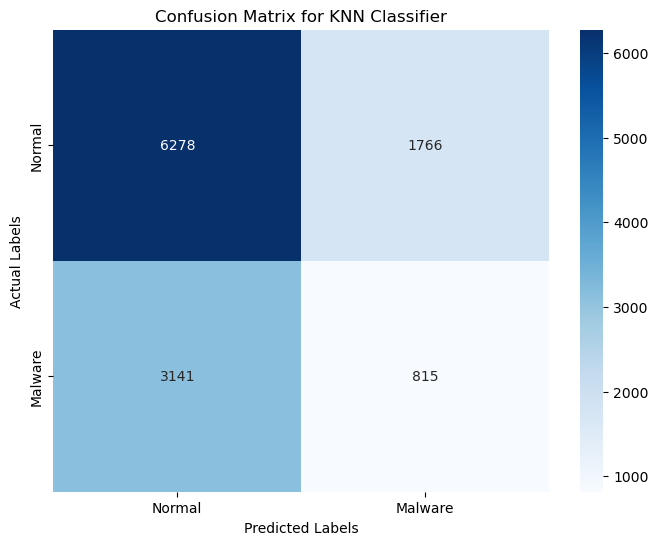

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '../sample_dataset/updated_cybersecurity_attacks.csv'
data = pd.read_csv(file_path)

features = [
    'Protocol', 'Traffic Type', 'Action Taken', 'Severity Level', 
    'Log Source', 'Geo-location Data', 'Packet Length', 'Anomaly Scores', 
    'Malware Indicators', 'Alerts/Warnings'
]
target = 'Attack Type'

required_columns = features + [target]
data_filtered = data[required_columns]

# Encode categorical features
encoders = {}
for column in ['Protocol', 'Traffic Type', 'Action Taken', 'Severity Level', 
               'Log Source', 'Geo-location Data', 'Malware Indicators', 'Alerts/Warnings']:
    le = LabelEncoder()
    data_filtered.loc[:, column] = le.fit_transform(data_filtered[column])
    encoders[column] = le

# Scale numerical features
scaler = StandardScaler()
data_filtered.loc[:, ['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(
    data_filtered[['Packet Length', 'Anomaly Scores']]
)

# Convert target to binary classification (e.g., 'Malware' vs non-'Malware')
data_filtered['Binary Attack Type'] = (data_filtered[target] == 'Malware').astype(int)


X = data_filtered[features]
y = data_filtered['Binary Attack Type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


y_pred = knn_classifier.predict(X_test)


classification_report_knn = classification_report(
    y_test, y_pred, target_names=['Normal', 'Malware'], labels=[0, 1]
)

print("\nClassification Report for KNN:\n", classification_report_knn)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", 
    xticklabels=['Normal', 'Malware'], yticklabels=['Normal', 'Malware']
)
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_19564\3172624411.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = le.fit_transform(data_filtered[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_19564\3172624411.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = le.fit_transform(data_filtered[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_19564\3172624411.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


Classification Report for KNN:
               precision    recall  f1-score   support

        High       0.33      0.47      0.39      3934
         Low       0.34      0.32      0.33      4020
      Medium       0.34      0.22      0.27      4046

    accuracy                           0.34     12000
   macro avg       0.34      0.34      0.33     12000
weighted avg       0.34      0.34      0.33     12000

Confusion Matrix:
 [[1865 1251  818]
 [1873 1269  878]
 [1894 1265  887]]


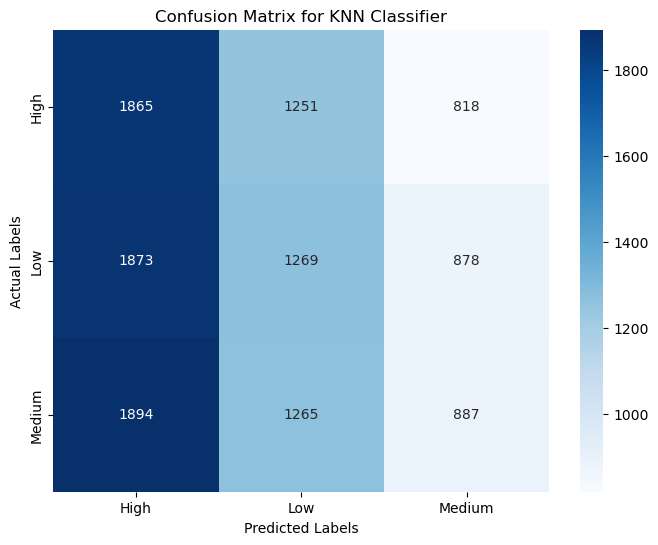

In [ ]:
# Severity Level as the Target Class

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace the file path accordingly)
file_path = '../sample_dataset/updated_cybersecurity_attacks.csv'

data = pd.read_csv(file_path)

# Define features and target
features = [
    'Protocol', 'Traffic Type', 'Action Taken', 'Log Source', 'Geo-location Data', 
    'Packet Length', 'Anomaly Scores', 'Malware Indicators', 'Alerts/Warnings'
]
target = 'Severity Level'

# Filter the necessary columns
required_columns = features + [target]
data_filtered = data[required_columns]

# Encode categorical features using LabelEncoder
encoders = {}
for column in ['Protocol', 'Traffic Type', 'Action Taken', 'Log Source', 
               'Geo-location Data', 'Malware Indicators', 'Alerts/Warnings']:
    le = LabelEncoder()
    data_filtered[column] = le.fit_transform(data_filtered[column])
    encoders[column] = le

# Scale numerical features (Packet Length, Anomaly Scores)
scaler = StandardScaler()
data_filtered[['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(data_filtered[['Packet Length', 'Anomaly Scores']])

# Convert the target 'Severity Level' to numerical encoding
severity_encoder = LabelEncoder()
data_filtered['Severity Level'] = severity_encoder.fit_transform(data_filtered[target])

# Define feature matrix (X) and target vector (y)
X = data_filtered[features]
y = data_filtered['Severity Level']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = knn_classifier.predict(X_test)

# Generate the classification report
classification_report_knn = classification_report(
    y_test, y_pred, target_names=severity_encoder.classes_
)

print("\nClassification Report for KNN:\n", classification_report_knn)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", 
    xticklabels=severity_encoder.classes_, yticklabels=severity_encoder.classes_
)
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_11864\696057968.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.66929478  0.94353482 -1.14280809 ...  0.62866049 -0.7173672
  0.94593844]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_filtered.loc[:,['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(data_filtered[['Packet Length', 'Anomaly Scores']])
C:\Users\DELL\AppData\Local\Temp\ipykernel_11864\696057968.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Malware Indicators'] = encoder.fit_transform(data_filtered[target])



Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.49      0.49      0.49      5968
           1       0.50      0.51      0.50      6032

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000

Confusion Matrix:
 [[2912 3056]
 [2973 3059]]


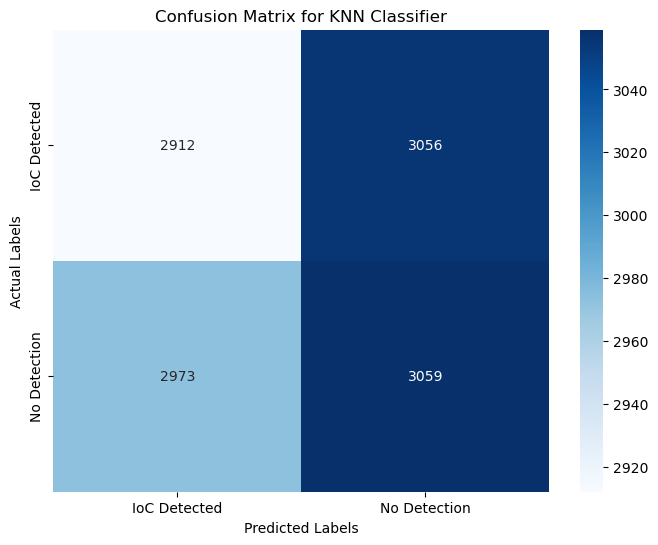

In [18]:
# Take Malware Indicator as a target class


import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '../sample_dataset/updated_cybersecurity_attacks.csv'

data = pd.read_csv(file_path)

features = [
    'Protocol', 'Traffic Type', 'Action Taken', 'Log Source', 'Geo-location Data', 
    'Packet Length', 'Anomaly Scores', 'Severity Level', 'Alerts/Warnings'
]
target = 'Malware Indicators'

required_columns = features + [target]
data_filtered = data[required_columns]


encoders = {}
for column in ['Protocol', 'Traffic Type', 'Action Taken', 'Log Source', 
               'Geo-location Data', 'Severity Level', 'Alerts/Warnings']:
    le = LabelEncoder()
    data_filtered.loc[:,column] = le.fit_transform(data_filtered[column])
    encoders[column] = le


scaler = StandardScaler()
data_filtered.loc[:,['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(data_filtered[['Packet Length', 'Anomaly Scores']])


# Convert the target 'Malware Indicators' to numerical encoding
encoder = LabelEncoder()
data_filtered['Malware Indicators'] = encoder.fit_transform(data_filtered[target])

X = data_filtered[features]
y = data_filtered['Malware Indicators']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)


classification_report_knn = classification_report(
    y_test, y_pred
)

# 0 if the IoC Detected and 1 if No Detection

print("\nClassification Report for KNN:\n", classification_report_knn)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", 
    xticklabels=encoder.classes_, yticklabels=encoder.classes_
)
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [23]:
import pandas as pd



file_path = '../sample_dataset/updated_cybersecurity_attacks.csv'

data = pd.read_csv(file_path)

data.iloc[111]



Unnamed: 0                                                              111
Timestamp                                               2021-10-03 00:19:39
Source IP Address                                            206.106.57.176
Destination IP Address                                       81.164.233.152
Source Port                                                           62889
Destination Port                                                      50054
Protocol                                                                UDP
Packet Length                                                          1191
Packet Type                                                            Data
Traffic Type                                                            DNS
Payload Data              Voluptates reiciendis placeat illo similique c...
Malware Indicators                                             IoC Detected
Anomaly Scores                                                        53.38
Alerts/Warni